## Chapter 6 - Exercise 1: Trực quan hóa dữ liệu Chipotle

#### Cho dữ liệu 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'

Nhà hàng Chipotle cần phân tích dữ liệu bán được trong ngày diễn ra khuyến mãi để có thể điều chỉnh thực đơn và thực hiện các chương trình khuyến mãi phù hợp.

Dữ liệu được cung cấp trong file chipotle.tsv, hãy thực hiện các yêu cầu sau, và đối chiếu với kết quả cho trước:

In [12]:
import pandas as pd
import collections
import matplotlib.pyplot as plt 

%matplotlib inline

In [106]:
# Câu 1: Đọc dữ liệu và gán vào biến chipo 
chipo = pd.read_csv('chipotle.tsv', sep='\t')

# Hiển thị 10 dòng đầu của dữ liệu
chipo.head(10)



,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


<details>
  <summary>Nhấn vào đây để xem kết quả!</summary>
  <div>
<style scoped="">
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>order_id</th>
      <th>quantity</th>
      <th>item_name</th>
      <th>choice_description</th>
      <th>item_price</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>1</td>
      <td>1</td>
      <td>Chips and Fresh Tomato Salsa</td>
      <td>NaN</td>
      <td>$2.39</td>
    </tr>
    <tr>
      <th>1</th>
      <td>1</td>
      <td>1</td>
      <td>Izze</td>
      <td>[Clementine]</td>
      <td>$3.39</td>
    </tr>
    <tr>
      <th>2</th>
      <td>1</td>
      <td>1</td>
      <td>Nantucket Nectar</td>
      <td>[Apple]</td>
      <td>$3.39</td>
    </tr>
    <tr>
      <th>3</th>
      <td>1</td>
      <td>1</td>
      <td>Chips and Tomatillo-Green Chili Salsa</td>
      <td>NaN</td>
      <td>$2.39</td>
    </tr>
    <tr>
      <th>4</th>
      <td>2</td>
      <td>2</td>
      <td>Chicken Bowl</td>
      <td>[Tomatillo-Red Chili Salsa (Hot), [Black Beans...</td>
      <td>$16.98</td>
    </tr>
    <tr>
      <th>5</th>
      <td>3</td>
      <td>1</td>
      <td>Chicken Bowl</td>
      <td>[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...</td>
      <td>$10.98</td>
    </tr>
    <tr>
      <th>6</th>
      <td>3</td>
      <td>1</td>
      <td>Side of Chips</td>
      <td>NaN</td>
      <td>$1.69</td>
    </tr>
    <tr>
      <th>7</th>
      <td>4</td>
      <td>1</td>
      <td>Steak Burrito</td>
      <td>[Tomatillo Red Chili Salsa, [Fajita Vegetables...</td>
      <td>$11.75</td>
    </tr>
    <tr>
      <th>8</th>
      <td>4</td>
      <td>1</td>
      <td>Steak Soft Tacos</td>
      <td>[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...</td>
      <td>$9.25</td>
    </tr>
    <tr>
      <th>9</th>
      <td>5</td>
      <td>1</td>
      <td>Steak Burrito</td>
      <td>[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...</td>
      <td>$9.25</td>
    </tr>
  </tbody>
</table>
</div>
  
</details>

In [15]:
# Câu 2: 
# Tạo biến x chứa các item_name là các món ăn được khách hàng gọi 
x = chipo['item_name']

# in head của x
x.head()

0             Chips and Fresh Tomato Salsa
1                                     Izze
2                         Nantucket Nectar
3    Chips and Tomatillo-Green Chili Salsa
4                             Chicken Bowl
Name: item_name, dtype: object

<details>
  <summary>Nhấn vào đây để xem kết quả!</summary>
  <pre>0             Chips and Fresh Tomato Salsa
1                                     Izze
2                         Nantucket Nectar
3    Chips and Tomatillo-Green Chili Salsa
4                             Chicken Bowl
Name: item_name, dtype: object</pre>
  
</details>

In [22]:
# Tạo một dictionary với 2 thông tin: tên món ăn (item_name) và tần suất/số lần gọi món 
# gợi ý: Sử dụng collections.Counter(x) 
letter_counts = collections.Counter(x)

# in kết quả
letter_counts

Counter({'Chips and Fresh Tomato Salsa': 110,
         'Izze': 20,
         'Nantucket Nectar': 27,
         'Chips and Tomatillo-Green Chili Salsa': 31,
         'Chicken Bowl': 726,
         'Side of Chips': 101,
         'Steak Burrito': 368,
         'Steak Soft Tacos': 55,
         'Chips and Guacamole': 479,
         'Chicken Crispy Tacos': 47,
         'Chicken Soft Tacos': 115,
         'Chicken Burrito': 553,
         'Canned Soda': 104,
         'Barbacoa Burrito': 91,
         'Carnitas Burrito': 59,
         'Carnitas Bowl': 68,
         'Bottled Water': 162,
         'Chips and Tomatillo Green Chili Salsa': 43,
         'Barbacoa Bowl': 66,
         'Chips': 211,
         'Chicken Salad Bowl': 110,
         'Steak Bowl': 211,
         'Barbacoa Soft Tacos': 25,
         'Veggie Burrito': 95,
         'Veggie Bowl': 85,
         'Steak Crispy Tacos': 35,
         'Chips and Tomatillo Red Chili Salsa': 48,
         'Barbacoa Crispy Tacos': 11,
         'Veggie Salad Bowl': 1

<details>
  <summary>Nhấn vào đây để xem kết quả!</summary>
  <pre>Counter({'Chips and Fresh Tomato Salsa': 110,
         'Izze': 20,
         'Nantucket Nectar': 27,
         'Chips and Tomatillo-Green Chili Salsa': 31,
         'Chicken Bowl': 726,
         'Side of Chips': 101,
         'Steak Burrito': 368,
         'Steak Soft Tacos': 55,
         'Chips and Guacamole': 479,
         'Chicken Crispy Tacos': 47,
         'Chicken Soft Tacos': 115,
         'Chicken Burrito': 553,
         'Canned Soda': 104,
         'Barbacoa Burrito': 91,
         'Carnitas Burrito': 59,
         'Carnitas Bowl': 68,
         'Bottled Water': 162,
         'Chips and Tomatillo Green Chili Salsa': 43,
         'Barbacoa Bowl': 66,
         'Chips': 211,
         'Chicken Salad Bowl': 110,
         'Steak Bowl': 211,
         'Barbacoa Soft Tacos': 25,
         'Veggie Burrito': 95,
         'Veggie Bowl': 85,
         'Steak Crispy Tacos': 35,
         'Chips and Tomatillo Red Chili Salsa': 48,
         'Barbacoa Crispy Tacos': 11,
         'Veggie Salad Bowl': 18,
         'Chips and Roasted Chili-Corn Salsa': 18,
         'Chips and Roasted Chili Corn Salsa': 22,
         'Carnitas Soft Tacos': 40,
         'Chicken Salad': 9,
         'Canned Soft Drink': 301,
         'Steak Salad Bowl': 29,
         '6 Pack Soft Drink': 54,
         'Chips and Tomatillo-Red Chili Salsa': 20,
         'Bowl': 2,
         'Burrito': 6,
         'Crispy Tacos': 2,
         'Carnitas Crispy Tacos': 7,
         'Steak Salad': 4,
         'Chips and Mild Fresh Tomato Salsa': 1,
         'Veggie Soft Tacos': 7,
         'Carnitas Salad Bowl': 6,
         'Barbacoa Salad Bowl': 10,
         'Salad': 2,
         'Veggie Crispy Tacos': 1,
         'Veggie Salad': 6,
         'Carnitas Salad': 1})</pre>
  
</details>

In [38]:
# Câu 3: Chuyển dictionary câu 2 thành DataFrame df để chuẩn bị cho các yêu cầu phân tích sau đó
df = pd.DataFrame.from_dict(letter_counts, orient = 'index')
df

,0
Chips and Fresh Tomato Salsa,110
Izze,20
Nantucket Nectar,27
Chips and Tomatillo-Green Chili Salsa,31
Chicken Bowl,726
Side of Chips,101
Steak Burrito,368
Steak Soft Tacos,55
Chips and Guacamole,479
Chicken Crispy Tacos,47


<details>
  <summary>Nhấn vào đây để xem kết quả!</summary>
  <div>
<style scoped="">
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>0</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>Chips and Fresh Tomato Salsa</th>
      <td>110</td>
    </tr>
    <tr>
      <th>Izze</th>
      <td>20</td>
    </tr>
    <tr>
      <th>Nantucket Nectar</th>
      <td>27</td>
    </tr>
    <tr>
      <th>Chips and Tomatillo-Green Chili Salsa</th>
      <td>31</td>
    </tr>
    <tr>
      <th>Chicken Bowl</th>
      <td>726</td>
    </tr>
  </tbody>
</table>
</div>
  
</details>

In [97]:
# Câu 4:
# a) Sắp xếp df theo tần suất giảm dần, và lấy 5 item đầu tiên
dfSort = df.sort_values(0, ascending = False)
#dfSort.reset_index()
dfFreq = pd.DataFrame(columns = ['Item', 'Price'])
dfFreq['Item'] = dfSort.index
dfFreq['Price'] = dfSort.values

#dfFreq

<details>
  <summary>Nhấn vào đây để xem kết quả!</summary>
  <div>
<style scoped="">
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>0</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>Chicken Bowl</th>
      <td>726</td>
    </tr>
    <tr>
      <th>Chicken Burrito</th>
      <td>553</td>
    </tr>
    <tr>
      <th>Chips and Guacamole</th>
      <td>479</td>
    </tr>
    <tr>
      <th>Steak Burrito</th>
      <td>368</td>
    </tr>
    <tr>
      <th>Canned Soft Drink</th>
      <td>301</td>
    </tr>
  </tbody>
</table>
</div>
  
</details>

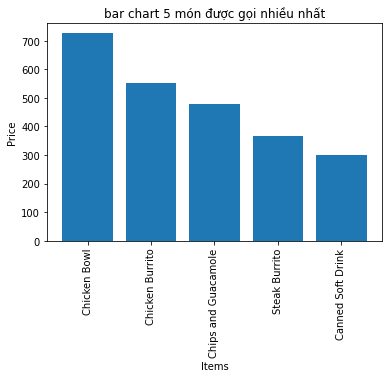

In [105]:
# b) Vẽ biểu đồ bar chart cho biết 5 món được gọi nhiều nhất (có title xlabel, ylabel và xsticks)

# Tạo plot
plt.bar(dfFreq['Item'][:5], dfFreq['Price'][:5])

# Thiết lập title và labels, xsticks (rotation='vertical')
plt.xlabel('Items')
plt.ylabel('Price')
plt.title('bar chart 5 món được gọi nhiều nhất')
plt.xticks(rotation='vertical')

# Hiển thị biểu đồ
plt.show()

<details>
  <summary>Nhấn vào đây để xem kết quả!</summary>
  <div class="output_subarea output_png"><img src="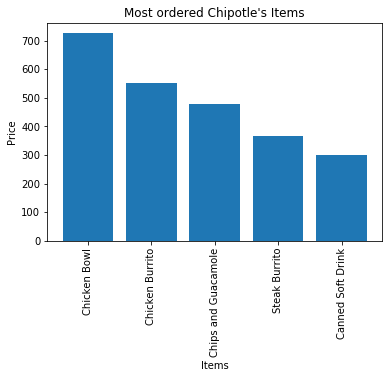
"></div>
  
</details>

In [129]:
# Câu 5: 
# a) Đổi kiểu dữ liệu của cột item_price sang kiểu số thực 
if isinstance(chipo['item_price'][0], str):
    chipo['item_price'] = [float(i[1:]) for i in chipo['item_price']] 
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98
6,3,1,Side of Chips,NaN,1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",9.25


<details>
  <summary>Nhấn vào đây để xem kết quả!</summary>
  <div>
<style scoped="">
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>order_id</th>
      <th>quantity</th>
      <th>item_name</th>
      <th>choice_description</th>
      <th>item_price</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>1</td>
      <td>1</td>
      <td>Chips and Fresh Tomato Salsa</td>
      <td>NaN</td>
      <td>2.39</td>
    </tr>
    <tr>
      <th>1</th>
      <td>1</td>
      <td>1</td>
      <td>Izze</td>
      <td>[Clementine]</td>
      <td>3.39</td>
    </tr>
    <tr>
      <th>2</th>
      <td>1</td>
      <td>1</td>
      <td>Nantucket Nectar</td>
      <td>[Apple]</td>
      <td>3.39</td>
    </tr>
    <tr>
      <th>3</th>
      <td>1</td>
      <td>1</td>
      <td>Chips and Tomatillo-Green Chili Salsa</td>
      <td>NaN</td>
      <td>2.39</td>
    </tr>
    <tr>
      <th>4</th>
      <td>2</td>
      <td>2</td>
      <td>Chicken Bowl</td>
      <td>[Tomatillo-Red Chili Salsa (Hot), [Black Beans...</td>
      <td>16.98</td>
    </tr>
  </tbody>
</table>
</div>
  
</details>

In [136]:
# b) Nhóm các đơn hàng theo order_id, và tính tổng số lượng gọi và tổng giá trị của mỗi đơn hàng, in kết quả
chipoGroup = chipo.groupby('order_id').sum()
chipoGroup.head(5)

,quantity,item_price
order_id,,
1,4,11.56
2,2,16.98
3,2,12.67
4,2,21.00
5,2,13.70


<details>
  <summary>Nhấn vào đây để xem kết quả!</summary>
  <div>
<style scoped="">
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>quantity</th>
      <th>item_price</th>
    </tr>
    <tr>
      <th>order_id</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>4</td>
      <td>11.56</td>
    </tr>
    <tr>
      <th>2</th>
      <td>2</td>
      <td>16.98</td>
    </tr>
    <tr>
      <th>3</th>
      <td>2</td>
      <td>12.67</td>
    </tr>
    <tr>
      <th>4</th>
      <td>2</td>
      <td>21.00</td>
    </tr>
    <tr>
      <th>5</th>
      <td>2</td>
      <td>13.70</td>
    </tr>
  </tbody>
</table>
</div>
  
</details>

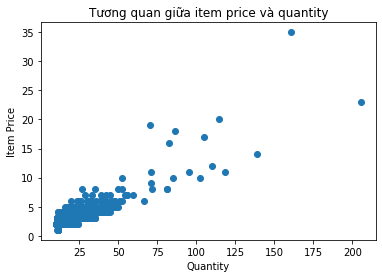

In [143]:
# Câu 6: Từ câu 5b, hãy vẽ scatterplot với x là item_price, và y là quantity, có title, xlabel, ylabel
# Bạn có nhận xét gì qua biểu đồ này 
plt.scatter(chipoGroup['item_price'], chipoGroup['quantity'])
plt.title('Tương quan giữa item price và quantity')
plt.xlabel('Quantity')
plt.ylabel('Item Price')

plt.show()

print('Nhận xét: tương quan tuyến tính ... và thưa dần về sau ...')

<details>
  <summary>Nhấn vào đây để xem kết quả!</summary>
  <div class="output_subarea output_png"><img src="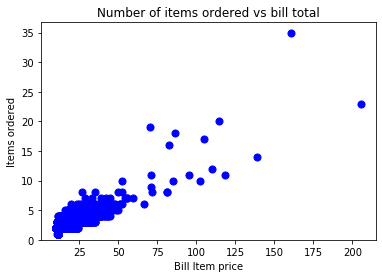
"></div>
  
</details>